In [29]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. 데이터 로드
df = pd.read_csv('/content/TSLA.csv')

In [30]:
X = df[['Open', 'High', 'Low', 'Close']].values
y = df[['Close']].values

In [31]:
# 2. 정규화
scaler_X = MinMaxScaler()
scaled_X = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(y)

In [32]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(scaled_X)-window):
    X.append(scaled_X[i:i+window])
    y.append(scaled_y[i+window])
X, y = np.array(X), np.array(y)

In [33]:
# 트레인/테스트

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [34]:
# RNN 모델

RNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,4)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

RNN_model.compile(optimizer='adam', loss='mse')
RNN_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


236/236 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0020 - val_loss: 1.8974e-05
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1464e-06 - val_loss: 1.5564e-05
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6935e-06 - val_loss: 9.3234e-06
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.2015e-06 - val_loss: 8.6170e-06
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2.5767e-06 - val_loss: 1.5701e-05
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6236e-06 - val_loss: 6.4154e-06
Epoch 7/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9075e-06 - val_loss: 5.3532e-06
Epoch 8/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6562e-06 - val_loss: 4.6569e-06
Epoch 9/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6836e-06 - val_loss: 4.7354e-06
Epoch 10/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1434e-05 - val_loss: 5.9442e-06
Epoch 11/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8245e-06 

In [35]:
# 4. LSTM 모델
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,4)),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer='adam', loss='mse')
LSTM_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.8593e-05 - val_loss: 8.0380e-06
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5060e-06 - val_loss: 6.7615e-06
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.9572e-06 - val_loss: 8.1523e-06
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.1097e-06 - val_loss: 6.8546e-06
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0599e-06 - val_loss: 5.4858e-06
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7876e-06 - val_loss: 5.2669e-06
Epoch 7/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9253e-06 - val_loss: 5.6398e-06
Epoch 8/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7886e-06 - val_loss: 5.6300e-06
Epoch 9/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9177e-06 - val_loss: 4.5044e-06
Epoch 10/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4679e-06 - val_loss: 4.8133e-06
Epoch 11/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


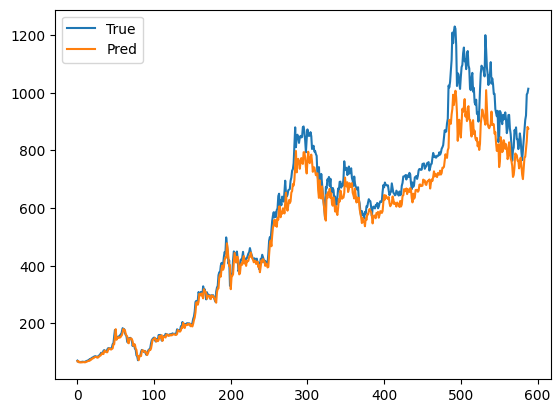

In [36]:
# RNN 예측
pred = RNN_model.predict(X_test)
plt.plot(scaler_y.inverse_transform(y_test), label='True')
plt.plot(scaler_y.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


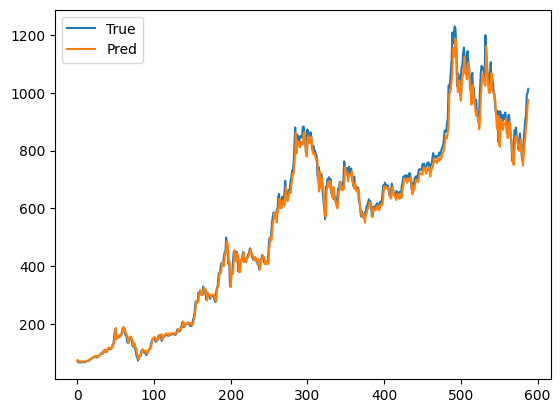

In [37]:
# LSTM 예측
pred = LSTM_model.predict(X_test)
plt.plot(scaler_y.inverse_transform(y_test), label='True')
plt.plot(scaler_y.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

In [38]:
# RNN MSE
loss = RNN_model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE (evaluate): {loss:.4f}")

Test MSE (evaluate): 0.0034


In [39]:
# LSTM MSE
loss = LSTM_model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE (evaluate): {loss:.4f}")

Test MSE (evaluate): 0.0006
